from https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

In [4]:
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

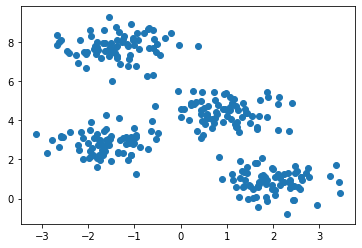

In [9]:
X, y = make_blobs(n_samples=300
                  , centers = 4
                  , cluster_std=0.6
                  , random_state = 0
                 )
plt.scatter(X[:, 0], X[:, 1]);

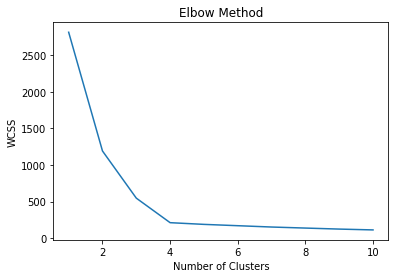

In [15]:
# within cluster sum of sqaures (WCSS) elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i
                    , init='k-means++'
                    , max_iter=300
                    , n_init=10
                    , random_state=0
                   )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');

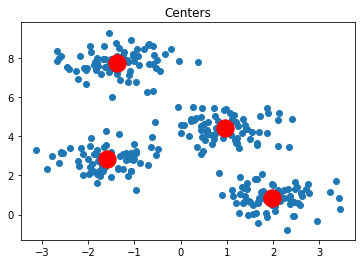

In [18]:
kmeans = KMeans(n_clusters=4
                , init='k-means++'
                , max_iter=300
                , n_init=10
                , random_state = 0
               )
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0]
            , kmeans.cluster_centers_[:, 1]
            , s=300
            , c='red'
           )
plt.title('Centers');

from https://medium.com/datadriveninvestor/kmeans-clustering-on-wearable-device-dataset-are-you-lying-sitting-or-running-ffe0637e7844